In [13]:
# Les noms des variables utilisées dans le projet

E_original: int = 480 #EV recharging rate (km/h)
    
L_original: int = 1000 #Total length (km)

v_original: float = 120 # vehicle velocity (km/h)

t_drinving: float = (L_original*(10**3))/(v_original*3.6) #Time driving (s)

t_charging: float = (L_original*(10**3))/(E_original*3.6)  #Time charging (s)

vf_original: float = 1/((1/v_original) + (1/E_original)) #Average velocity (km/h)

q_: float # vehicule range (km)

q_max: float = 300 #Maximum vehicle range (Km)

q_original: float = 150 #Charging threshold (km)

K_original: int = 40 #Number of charging stations

m_original: int = 5 #Number of charging ports

l_original: int = L_original//K_original #Distance between stations (km)
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

lamda: float = 200 #Rate (veh/h)
lamda_c: float = (2*m_original*K_original*E_original)/L_original #Critical rate (veh/h)
range_consumed: float = lamda*L_original/2 #Average consumed range per unit time (Km/h)
range_supplied: float = m_original*K_original*E_original #Maximum total range potentially supplied by all charging stations per unit time (Km/h)
rho: float #Density of vehicules (1/m)
rho_max: float #Maximum density (1/m)
tc_range: float #Total consumed range (m/s)
rho_c: float #Critical density (1/m)


#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def highway(lenght: int, l: int) -> list[list[str]]:
    """Renvoie une liste de 0 qui et S représente le trajet parcourus par les voitures"""

    chemin: list[list[str]] = []
    
    nb_interval: int = lenght//l
    lenght_reste: int = lenght%l
        
    #On considère que un interval de 1Km peut contenir 13 voitures
    #Avec chaque voiture est de longeur 5m et entre chaque voiture et l'autre une distance d'au moins 70m
    
    #On crée l'interval qui exite entre chaque station qui vas contenir des places vides qui vont ensuite êtres occuppées par les voitures
    nb_voitures_interval: int = l*13
    interval: list[str] = []
    j: int
    for j in range(nb_voitures_interval):
        interval.append("0")
        
    i: int
    for i in range(nb_interval):
        chemin.append(interval)
        chemin.append([f"S{i+1:d}"])
    
    
    
    #On crée l'interval qui reste après une répartition des stations d'une manière équidistante si il existe:
    
    #Si il reste encore un interval:
    if (lenght_reste != 0):
        nb_voitures_interval_reste: int = lenght_reste*13
        interval_reste: list[str] = []
        k: int
        for k in range(nb_voitures_interval_reste):
            interval_reste.append("0")
        
        chemin.append(interval_reste)
        return chemin
    
    #Si il ne reste pas un interval à ajouter:
    else:
        return chemin
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------



#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
import random
import math

def ev_car(vf: float) -> dict[str, float]:
    """Renvoie un dictionnaire qui représente une voiture qui vien d'entrer dans le trajet"""

    #On génère une valeur aléatoire qui correspond au range pour la voiture
    a: int = random.random()*300
    q: float = math.floor(a) + 1

    #La clé state représente le statue de la voiture si c'est 0.0 donc la voiture
    #n'est pas entrain de ce rechargé, et si c'est 1.0 donc la voiture est située dans
    #un station entrain de se rechargée 
    return {"vf": vf, "range_q": q, "t_driving": 0.0, "t_charging": 0.0, "state": 1.0}
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------



#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def liste_stations(nb_stations: int, nb_ports: int) -> list[list[str]]:
    """Renvoie une liste ordonnée des stations existants"""

    station: list[str] = []
    i: int
    for i in range(nb_ports):
        station.append("0")

    res: list[list[str]] = []
    j: int
    for j in range(nb_stations):
        res.append(station)

    return res
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------



#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def liste_listes_attente(nb_stations: int) -> list[list[str]]:
    """Renvoie une liste ordonnée des listes d'attente des stations existants"""

    res: list[list[str]] = []
    j: int
    for j in range(nb_stations):
        res.append([])

    return res
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------



#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def liste_voitures(nb_voitures: int, vf: float) -> list[dict[str, float]]:
    """Renvoie une liste ordonnée des voitures existants"""

    res: list[dict[str, float]] = []

    i: int
    for i in range(nb_voitures):
        voiture: dict[str, float] = ev_car(vf)
        res.append(voiture)

    return res
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------



#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def station_exist_car(l : list[str])-> bool:
    """Renvoie True si la station contient au moins une voiture"""
    e :str
    for e in l :
        if e != "0":
            return True
    return False
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------



#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def liste_vide(l : list[str])-> bool:
    """Renvoie True si la liste contient une case vide et False sinon"""
    e :str
    for e in l :
        if e == "0":
            return True
    return False
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------



#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def reservoir_plein (voiture : dict[str,float])-> bool :
    """Renvoie True si le reservoir est plein et False sinon"""

    return voiture["range_q"]== q_max
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------



#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def print_stations(l_stations: list[list[str]]) -> None:
    """Affiche les stations de l_stations"""
    
    print("LES STATIONS SONT:")
    print("----------------------------------------------------------------------------------------------")
    x: int
    for x in range(len(l_stations)):
        print(f"S{x+1:d} --> {l_stations[x]}")
        
    return None
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------



#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def print_attente(l_attente: list[list[str]]) -> None:
    """Affiche les stations d'attente de l_attente"""
    
    print("LES STATIONS D'ATTENTE SONT:")
    print("----------------------------------------------------------------------------------------------")
    x: int
    for x in range(len(l_attente)):
        print(f"s{x+1:d} --> {l_attente[x]}")
        
    return None
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------



#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def print_voitures_finish(finish_cars: list[dict[str:float]]) -> None:
    """Affiche les voitures de finish_cars"""
    
    print("LES VOITURES QUI ONT FINIS LE TRAJET SONT:")
    print("----------------------------------------------------------------------------------------------")
    x: int
    for x in range(len(finish_cars)):
        print(f"V{x+1:d} --> {finish_cars[x]}")
        
    return None
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------



#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def print_voitures(l_voitures: list[dict[str:float]]) -> None:
    """Affiche les voitures de l_voitures en supposant que les voitures sont ordonnées par ordre croissant"""
    
    print("LES VOITURES SONT:")
    print("----------------------------------------------------------------------------------------------")
    x: int
    for x in range(len(l_voitures)):
        print(f"V{x+1:d} --> ", l_voitures[x])
        
    return None
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def print_voiture(l_voitures: list[dict[str, int]], num: int) -> None:
    """Affiche la voiture numéro num"""
    
    print(f"V{num:d} --> ", l_voitures[num-1])
          
    return None


#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def congestion(chemin_original: list[list[str]], l:int, nb_stations: int, nb_voitures: int, nb_ports: int, vf: float, q_: float, E: int):
    """Applique l'algorithme"""
    # l: la distance entre les stations du chemin
    # q_: le seuil du range
    # E: recharging rate
    
    chemin: list[list[str]] = []
    p: int
    for p in range(len(chemin_original)):
        case1: list[str] = chemin_original[p]
        pp: int
        case1_inter: list[str] = []
        for pp in range(len(case1)):
            case1_inter.append(case1[pp])
        chemin.append(case1_inter)
    
    interval_vide: list[str] = chemin[0]   #Il sère comme référence d'un interval vide qui vas nous sérvire après

    temps_un_tour: float = l*(3600/vf)

    finish_cars: list[dict[str, float]] = []
    l_voitures: list[dict[str, float]] = liste_voitures(nb_voitures, vf)
    l_stations: list[list[str]] = liste_stations(nb_stations, nb_ports)
    l_attente: list[list[str]] = liste_listes_attente(nb_stations)

    #print("CHEMIN AU DEBUT DU PROGRAMME")
    #print("----------------------------------------------------------------------------------------------")
    #print(chemin)
    #print("\n")
    

    nb: int = 0
    #print_voitures(l_voitures)
    #print("\n")
    #print_stations(l_stations)
    #print("\n")
    #print_attente(l_attente)
    #print("\n")
    
    #print("----------------------------------------------------------------------------------------------")
    #print("----------------------------------------------------------------------------------------------")
    
    #x : int
    #for x in range(200):
    while (len(finish_cars) < nb_voitures):
        indice: int
        for indice in range(-1, -len(chemin)-1, -1):     #On parcours le chemin à l'envers en commencant  par la fin.
            case_: list[str] = [a for a in chemin[indice]]   #On récupères le contenue de la case
            case: str = chemin[indice][0] 
            
            #Si c'est une station
            if case[0] == "S":     #On voie si la première lettre de la case correspond à une station de recharge
                station: list[str] = [b for b in l_stations[int(case[1])-1]]     #On récupère la station qui correspond à celle trouver (S1 correspond à la station qui se trouve à l'indice 0 de notre liste des stations)
                station_attente: list[str] = [c for c in l_attente[int(case[1])-1]]    #On récupère la liste d'attente qui correspond à la station sur laquelle on est
                res1: bool = station_exist_car(station)

                if res1 == True:     #La station contient au moins une voiture
                    i: int
                    for i in range(len(station)):   #On parcours la liste et on change les paramètres des voitures
                        if station[i] != "0":
                            voiture: dict[str, float] = l_voitures[int(station[i])-1]   #Après qu'on trouve une voiture on cherche dans notre liste de voiture sur la voiture correpondante
                            voiture["t_charging"] = voiture["t_charging"] + temps_un_tour
                            voiture["range_q"] = voiture["range_q"] + ((temps_un_tour*E)/3600)
                            #Si on dépasse la capacité de la voiture simplement on l'arrête automatiquement à la valeur de q_max
                            if voiture["range_q"] > q_max:
                                voiture["range_q"] = q_max

                            if reservoir_plein(voiture) == True:   #On vérifie si le réservoire de la voiture est plein après les changements
                                voiture["vf"] = vf     
                                voiture["state"] = 1.0
                                voiture["t_driving"] = voiture["t_driving"] + temps_un_tour
                                
                                #On faire sortire la voiture de la station pour l'jouter dans le chemin
                                interval_suivant: list[str] = [d for d in chemin[indice + 1]]
                                x: int
                                for x in range(len(interval_suivant)):
                                    if interval_suivant[x] == "0":
                                        interval_suivant[x] = station[i]
                                        break
                                
                                chemin[indice + 1] = [s for s in interval_suivant]
                                station[i] = "0"   #On vide sa place dans la station
                                l_stations[int(case[1])-1] = [d for d in station]   #Metre à jour notre liste des stations
                        
                                if station_exist_car(station_attente) == True: 
                                    car: str = station_attente[0]    #On récupère la première voiture dans la liste d'attente
                                    station[i] = car     #On ajoute ensuite la voiture dans la station à la place de la voiture qui est déjà sortie
                                    l_stations[int(case[1])-1] = [dd for dd in station]   #Metre à jour notre liste des stations
                                    station_attente = station_attente[1:]     #On fait vider sa place dans la liste d'attente
                                    l_attente[int(case[1])-1] = [s for s in station_attente]   #Metre à jour notre liste des stations d'attente
                                    car_: dict[str, float] = l_voitures[int(car)-1]   #C'étais un -i???
                                    car_["state"] = 0.0
                                    car_["t_charging"] = car_["t_charging"] + temps_un_tour

                #station_attente_: list[str] = l_attente[int(case[1])-1]
                #Si la station ne contient pas de voitures on vas aller chercher dans la liste d'attente
                if station_exist_car(station_attente) == True:   #On parcours la nouvelle liste d'attente modifier pour voir si il reste encore des voitures
                    k: str
                    for k in station_attente:
                        if k != "0":
                            cars: dict[str, float] = l_voitures[int(k)-1]
                            cars["t_charging"] = cars["t_charging"] + temps_un_tour     #On change les paramètres des voitures restantes

            #Si la case contient un groupement de voitures:
            else:
                #Si on est dans la dernière case du chemin fait sortir les voitures du chemin pour les ajouter dans notre liste des voitures qui on finis leurs trajet
                if indice == (-1):
                    v: int
                    for v in range(len(case_)):
                        voiture_: dict[str, float] = l_voitures[int(case_[v])-1]   #On récupère la voiture
                        finish_cars.append(voiture_)
                        voiture_["range_q"] = voiture_["range_q"] - (len(case_))   #La voiture à parcours le reste du chemin
                        voiture_["t_driving"] = voiture_["t_driving"] + temps_un_tour
                        voiture_["vf"] = 0.0
                        voiture_["state"] = 3.0
                        case_[v] = "0"
                        chemin[indice] = [aa for aa in case_]   #Metre à jour notre chemin
                
                else:
                    #On est sur que la case suivante contientdra une station
                    case_suivante_: list[str] = [f for f in chemin[indice + 1]]
                    case_suivante: str = case_suivante_[0]
                        
                    station_: list[str] = [z for z in l_stations[int(case_suivante[1])-1]]   #On récupère la station correspondante
                        
                    interval: list[str] = [r for r in chemin[indice]]
                
                    w: int
                    for w in range (len(interval)):
                        if interval[w] != "0":
                            voiture2_: dict[str, float] = l_voitures[int(interval[w])-1]   #On récupère la voiture
                            if (voiture2_["range_q"] < q_):   #On vérifie le range de la voiture
                                if liste_vide(station_) == True:   #On vérifie si la station est contient une place vide
                                    p: int
                                    for p in range(len(station_)):   #On parcours la station pour trouver une place vide
                                        if (station_[p] == "0"):
                                            station_[p] = interval[w]
                                            break

                                    l_stations[int(case_suivante[1])-1] = station_
                                    interval[w] = "0"
                                    voiture2_["vf"] = 0.0
                                    voiture2_["state"] = 0.0
                                    chemin[indice] = interval   #Metre à jour notre chemin   #************************
                                    #Dès qu'on trouve une place vide on fait enter la voiture dans la station pour pouvoir la charger

                                else:
                                    if (voiture2_["range_q"] < l): #Sinon on vérifie si la voiture peut continuer jusqu'à la prochaine station ou non
                                        station_attente1: list[str] = [h for h in l_attente[int(case_suivante[1])-1]]   #On récupère la liste d'attente correspondante à notre station
                                        station_attente1.append(interval[w])
                                        l_attente[int(case_suivante[1])-1] = [hh for hh in station_attente1]
                                        interval[w] = "0"
                                        voiture2_["state"] = 2.0
                                        voiture2_["vf"] = 0.0
                                        voiture2_["t_driving"] = voiture2_["t_driving"] + temps_un_tour
                                        chemin[indice] = interval   #Metre à jour notre chemin
                                        #Si la voiture ne peut pas on l'ajoute à notre liste d'attente de la station
                                    
                    
                    #Après vérification pour touts les voitures de l'interval et voir ceux qui doivent sortir du chemin
                    #Il reste juste à déplacer les voitures qui restent dans l'interval vers le prochain interval puisque il ont tous un range sufisant
                    if (indice + 2 == 0):   #Si la case suivante n'existe pas, on fait sortir les voitures du trajet et on les ajoutent dans la liste des voitures qui on finis leurs trajet
                        
                        ww: str
                        for ww in interval:
                            if ww != "0":
                                ee: int = int(ww)-1
                                finish_cars.append(l_voitures[ee])
                                l_voitures[ee]["range_q"] = l_voitures[ee]["range_q"] - l
                                l_voitures[ee]["t_driving"] = l_voitures[ee]["t_driving"] + temps_un_tour
                                l_voitures[ee]["vf"] = 0.0
                                l_voitures[ee]["state"] = 3.0
                                chemin[indice] = ["0" for u in range(len(interval))]
                        
                    else:
                        interval_suivant: list[str] = [rr for rr in chemin[indice+2]]
                        ff: int
                        for ff in range(len(interval_suivant)):
                            if interval_suivant[ff] == "0":
                                gg: int
                                for gg in range(len(interval)):
                                    if interval[gg] != "0":
                                        interval_suivant[ff] = interval[gg]
                                        voiture5: dict[str, float] = l_voitures[int(interval[gg])-1]
                                        voiture5["range_q"] = voiture5["range_q"] - l
                                        voiture5["t_driving"] = voiture5["t_driving"] + temps_un_tour
                                        interval[gg] = "0"
                                        break
                        
                        chemin[indice] = interval
                        chemin[indice+2] = interval_suivant
                              
        #Après un tour:
        interval_entrer: list[str] = [g for g in chemin[0]]
        interval_entrer_new: list[str] = []
        vv: int
        for vv in range(-1, -len(interval_entrer)-1, -1):
            if (nb < nb_voitures):   #Après chaque tour on regarde si on est arrivés au nombre de voiture qu'on veut ajouter dans notre trajet lors de l'expérience
                interval_entrer_new.append(str(nb + 1))   #On comence par ajouter des voitures dont les noms commencent par "1" jusqu'au nombre voulue (nb_voitures)
                nb = nb + 1
        
        if (len(interval_entrer_new) == len(chemin[0])):
            chemin[0] = interval_entrer_new
        
        else:
            reste: int = len(chemin[0]) - len(interval_entrer_new)
            e: int
            for e in range(reste):
                interval_entrer_new.append("0")
                
            chemin[0] = interval_entrer_new
        
        #print("APRES UN TOUR:")
        #print(chemin)
        #print("\n")
        
        #print_stations(l_stations)
        #print("\n")
        
        #print_attente(l_attente)
        #print("\n")
        
        #print("LES VOITURES QUI ONT FINIS LEUR TRAJET SONT:")
        
        #print_voitures_finish(finish_cars)
        #print("\n")
        
        #print("----------------------------------------------------------------------------------------------")
        #print("----------------------------------------------------------------------------------------------")
        #print("\n\n")
       
    #print_voitures_finish(finish_cars)
    #print("\n")
    return finish_cars
                



#Jeu test:
L_ = 10 #Km
l_ = 1 #Km
nb_stations = L_//l_
nb_voitures = 30
nb_ports = 2
q_threashold = 150 #Km
E = 500 #Km/h
chemin: list[str] = highway(L_, l_)
#congestion(chemin, l_, nb_stations, nb_voitures, nb_ports, 120.0, q_threashold, E)

ARRAY DES VITESSES:
----------------------------------------------------------------------------------------------
[100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113.
 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127.
 128. 129. 130.]


ARRAY DES TEMPS MOYENS:
----------------------------------------------------------------------------------------------
[32703.         34101.98019802 31102.94117647 31992.23300971
 31009.61538462 31700.         30322.64150943 30440.18691589
 29963.88888889 30770.64220183 30387.27272727 31245.94594595
 30514.28571429 29086.72566372 28963.15789474 27764.34782609
 27535.34482759 28087.17948718 27933.05084746 27849.57983193
 27785.         27490.90909091 26586.8852459  26341.46341463
 25787.90322581 25910.4        26185.71428571 26787.4015748
 27499.21875    27265.11627907 26312.30769231]




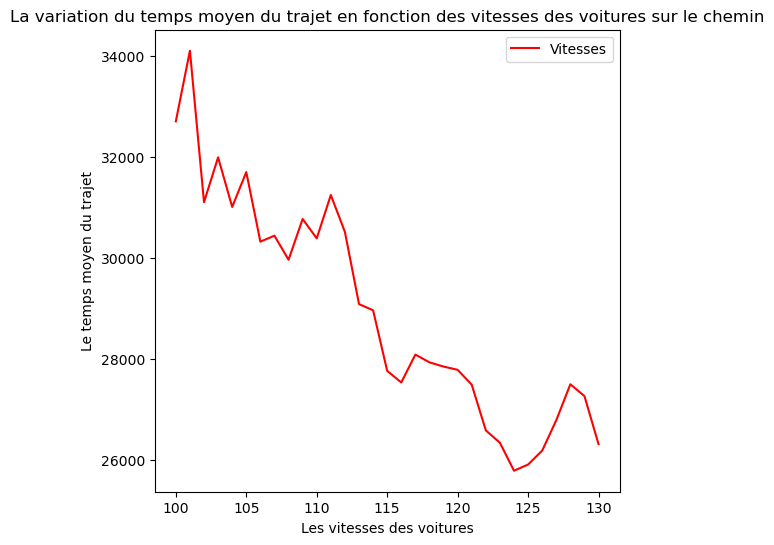

In [28]:
import numpy as np

# Pour les vitesses des voitures

def time(l: list[dict[str, float]]) -> float:
    """Renvoie le temps moyen du trajet"""

    if len(l) == 0:
        return 0

    res: float = 0

    i: int
    for i in range(len(l)):
        d: dict[str, float] = l[i]
        res = res + d["t_driving"] + d["t_charging"]

    return res/len(l)

#Données:
#--------------------------------------------------------------------------------------------------------------------------------------------------------
L_ = 500 #Km
l_ = 25 #Km
nb_stations = L_//l_
nb_voitures = 300
nb_ports = 5
q_threashold = 150 #Km
E = 500 #Km/h
chemin: list[str] = highway(L_, l_)

vitesse_voitures = np.linspace(100, 130, 31)   #C'est un array qui contient 100 valeurs correspondants à des vitesses comprisent entre 100Km/h et 130Km/h

temps_moyen_list: list[float] = []
#--------------------------------------------------------------------------------------------------------------------------------------------------------

#Résultats:
#--------------------------------------------------------------------------------------------------------------------------------------------------------
v: int
for v in (vitesse_voitures):
    res: list[dict[str,float]] = congestion(chemin, l_, nb_stations, nb_voitures, nb_ports, v, q_threashold, E)
    temps_moyen_list.append(time(res))
    
temps_moyen = np.array([t for t in temps_moyen_list])


print("ARRAY DES VITESSES:")
print("----------------------------------------------------------------------------------------------")
print(vitesse_voitures)
print("\n")

print("ARRAY DES TEMPS MOYENS:")
print("----------------------------------------------------------------------------------------------")
print(temps_moyen)
print("\n")
#--------------------------------------------------------------------------------------------------------------------------------------------------------

#Représentation graphique des résultats:
#--------------------------------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt

plt.figure("vitesses", figsize=(6,6))

plt.plot(vitesse_voitures, temps_moyen, "r", label = "Vitesses")
plt.xlabel("Les vitesses des voitures")
plt.ylabel("Le temps moyen du trajet")
plt.title("La variation du temps moyen du trajet en fonction des vitesses des voitures sur le chemin")
plt.legend()
plt.show()

ARRAY DE NOMBRE DE VOITURES:
----------------------------------------------------------------------------------------------
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.
  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.
  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.
  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.
  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.
  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.
  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107.
 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121.
 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135.
 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149.
 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163.
 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174. 175. 176. 177.
 178. 179. 180. 181. 182

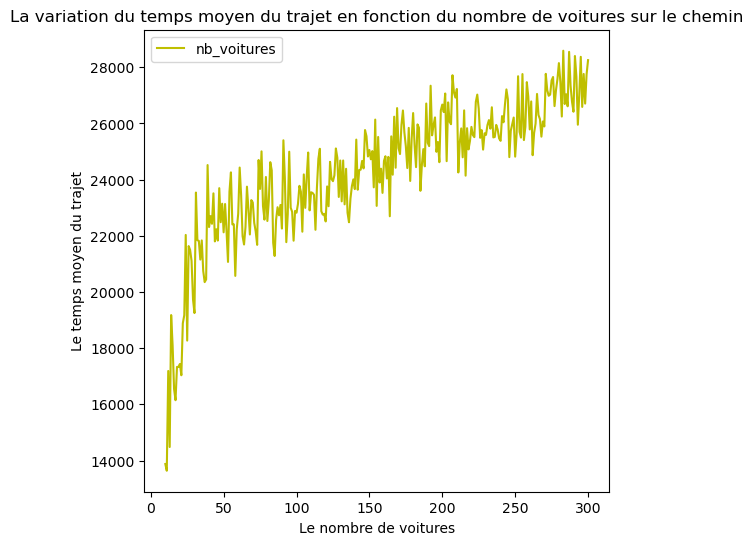

In [30]:
# Pour le nombres des voitures

#Données:
#--------------------------------------------------------------------------------------------------------------------------------------------------------
L_ = 500 #Km
l_ = 25 #Km
nb_stations = L_//l_
vitesse = 120.0
nb_ports = 5
q_threashold = 150 #Km
E = 500 #Km/h
chemin: list[str] = highway(L_, l_)

nombre_voitures = np.linspace(10, 300, 291)   #C'est un array qui contient 100 valeurs correspondants à des vitesses comprisent entre 100Km/h et 130Km/h

temps_moyen_list2: list[float] = []
#--------------------------------------------------------------------------------------------------------------------------------------------------------

#Résultats:
nb_v: int
for nb_v in (nombre_voitures):
    res2: list[dict[str,float]] = congestion(chemin, l_, nb_stations, int(nb_v), nb_ports, vitesse, q_threashold, E)
    temps_moyen_list2.append(time(res2))
    
temps_moyen2 = np.array([n for n in temps_moyen_list2])


print("ARRAY DE NOMBRE DE VOITURES:")
print("----------------------------------------------------------------------------------------------")
print(nombre_voitures)
print("\n")

print("ARRAY DES TEMPS MOYENS:")
print("----------------------------------------------------------------------------------------------")
print(temps_moyen)
print("\n")
#--------------------------------------------------------------------------------------------------------------------------------------------------------

#Représentation graphique des résultats:
#--------------------------------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt

plt.figure("nb_voitures", figsize=(6,6))

plt.plot(nombre_voitures, temps_moyen2, "y", label = "nb_voitures")
plt.xlabel("Le nombre de voitures")
plt.ylabel("Le temps moyen du trajet")
plt.title("La variation du temps moyen du trajet en fonction du nombre de voitures sur le chemin")
plt.legend()
plt.show()